<a href="https://colab.research.google.com/github/ivn-srg/data-analysis-course-omsu/blob/main/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5%207/%D0%98%D0%BD%D1%81%D1%82%D1%80%D1%83%D0%BC%D0%B5%D0%BD%D1%82%D1%8B_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.diagnostic import linear_reset
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import t
from scipy import stats
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

def draw_corr_matrix(data, figsize=(8, 6)):
  # Вычисление корреляционной матрицы
  corr_matrix = data.corr()

  # Создание маски для верхней треугольной части(просто для красоты и удобства)
  # Функция np.triu создает верхнюю треугольную матрицу из массива единиц (np.ones_like),
  # где все элементы выше главной диагонали равны True, а остальные — False.
  mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

  # Построение тепловой карты
  plt.figure(figsize=figsize)
  sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
  plt.title("Корреляционная матрица (только нижняя половина)")
  plt.show()

In [23]:
df = pd.read_csv('/content/student_depression_dataset.csv')
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [25]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [26]:
enc = LabelEncoder()

features_cat = ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress',
       'Family History of Mental Illness']

for col in features_cat:
  df[col] = enc.fit_transform(df[col])

In [27]:
list_of_params = [
    'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness'
]

X = df[list_of_params]
y = df['Depression']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация значений признаков для их соразмерности и улучшения анализа
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Логистическая регрессия

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid coral;">
    <ul style="font-size: 16px; font-family: 'Arial'; line-height: 1.5em;">
       Классификатор логистической регрессии — это алгоритм обучения с учителем, который используется для прогнозирования наблюдений в категориальных классах с получением дискретных результатов. Этот алгоритм используется для решения задач классификации, делая прогнозы в диапазоне от нуля до единицы, поэтому его можно применять для решения таких задач классификации, как удержание клиентов, конверсия, вероятность покупки и т. д. Независимые переменные (признаки) могут быть как числовыми, так и категориальными.
    </ul>
</div>

## **Понимание Logistic Regression**

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid coral;">
    <ul style="font-size: 16px; font-family: 'Arial'; line-height: 1.5em;">
      В логистической регрессии мы используем сигмоидальную функцию, которая преобразует выходное значение от нуля до единицы, и традиционную формулу регрессии внутри логистической функции, таким образом выстраивая взаимосвязь между зависимыми и независимыми переменными.
    </ul>
</div>

<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*WZM13gd9MvKtaj9sZFZPmw.png" alt="alzheimers" style="width:20%; height:auto; border-radius: 30px;">
</div>


<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*K9aObIFQuw_Kz9jAlJ8gDQ.png" style="width:30%; height:auto; border-radius: 30px;">
</div>



<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid coral;">
    <ul style="font-size: 16px; font-family: 'Arial'; line-height: 1.5em;">
      Метод логистической регрессии позволяет по-другому интерпретировать коэффициенты. Метод линейной регрессии описывает прямую линию, в то время как логистическая регрессия описывает кривую линию между нулём и единицей, которая выглядит как S-образная.
    </ul>
</div>


<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:700/1*VKOyjAsJtaR5fY_ENnampQ.jpeg" alt="alzheimers" style="width:100%; height:auto; border-radius: 30px;">
</div>

## Logistic Regression задачах классификации

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid coral;">
    <ul style="font-size: 16px; font-family: 'Arial'; line-height: 1.5em;">
      Линейная регрессия может давать прогнозы как ниже 0, так и выше 1, и не может быть сопоставлена с чётким пороговым значением классификации, таким как (0,5), что приводит к нестабильности прогнозов. Однако логистическая регрессия используется в задачах классификации, поскольку она выполняет классификацию на основе диапазона вероятностей. Таким образом, она решает эти проблемы за счёт включения сигмоидальной функции, которая преобразует результат в диапазон от 0 до 1, что крайне важно для получения значимых вероятностей классов.
    </ul>
</div>


<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*XRCJt-5yNXDfzrVbEbh4DA.gif" alt="alzheimers" style="width:100%; height:auto; border-radius: 30px;">
</div>


## Типы логистических классификаторов

<h2>1. Бинарная логистическая регрессия</h2>
    <p><strong>Описание:</strong> это самая простая форма логистической регрессии, в которой целевая переменная имеет только два возможных значения.</p>
    <p><strong>Пример:</strong> определение того, является ли электронное письмо спамом (спам или не спам).</p>

  <h2>2. Многовариантная логистическая регрессия</h2>
    <p><strong>Описание:</strong> этот тип логистической регрессии используется, когда целевая переменная имеет более двух категорий, и эти категории не упорядочены.</p>
    <p><strong>Пример:</strong> прогнозирование типа фрукта (яблоко, апельсин, банан).</p>

  <h2>3. Порядковая логистическая регрессия</h2>
    <p><strong>Описание:</strong> используется, когда целевая переменная имеет более двух категорий, и эти категории имеют естественный порядок.</p>
    <p><strong>Пример:</strong> прогнозирование уровня образования (средняя школа, бакалавриат, магистратура).</p>

  <h2>Резюме</h2>
    <ul>
        <li><strong>Бинарная логистическая регрессия:</strong> два класса (например, да/нет, успех/неудача).</li>
        <li><strong>Мультиномиальная логистическая регрессия:</strong> более двух классов без порядка (например, кошка, собака, кролик).</li>
        <li><strong>Порядковая логистическая регрессия:</strong> более двух классов с естественным порядком (например, низкий, средний, высокий).</li>
    </ul>

In [29]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [30]:
logistic_regression_model.coef_

array([[ 0.00366399, -0.53542582, -0.03558507, -0.06114376,  1.16888755,
         0.00613917,  0.09489271, -0.33553688,  0.00869212, -0.04332163,
         0.42888137,  0.02290561,  1.23241687,  0.43487561,  0.79764121,
         0.14190256]])

In [31]:
logistic_regression_model.intercept_

array([0.60576766])

In [32]:
y_pred = logistic_regression_model.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [33]:
score = logistic_regression_model.score(X_test_scaled, y_test)
score

0.8364092456549006

# Метрики оценки качества моделей классификации

# Метрики оценки качества моделей классификации

## 1. Метрики на основе матрицы ошибок (Confusion Matrix)

**Матрица ошибок** содержит информацию о фактических и предсказанных классификациях:

- **True Positive (TP)**: Правильно предсказанные положительные примеры
- **True Negative (TN)**: Правильно предсказанные отрицательные примеры
- **False Positive (FP)**: Отрицательные примеры, неправильно предсказанные как положительные (ошибка I рода)
- **False Negative (FN)**: Положительные примеры, неправильно предсказанные как отрицательные (ошибка II рода)

### Производные метрики:

#### Accuracy (точность)
- **Формула**: (TP + TN) / (TP + TN + FP + FN)
- **Смысл**: Доля правильных предсказаний среди всех предсказаний
- **Недостаток**: Неинформативна при несбалансированных классах

#### Precision (точность в узком смысле)
- **Формула**: TP / (TP + FP)
- **Смысл**: Доля истинно положительных случаев среди всех положительных предсказаний
- **Интерпретация**: Отвечает на вопрос: "Насколько можно доверять положительным прогнозам модели?"

#### Recall (полнота, чувствительность)
- **Формула**: TP / (TP + FN)
- **Смысл**: Доля обнаруженных положительных примеров от их общего числа
- **Интерпретация**: Отвечает на вопрос: "Какую часть положительных примеров модель смогла обнаружить?"

#### Specificity (специфичность)
- **Формула**: TN / (TN + FP)
- **Смысл**: Доля правильно идентифицированных отрицательных примеров

#### F1-score
- **Формула**: 2 × (Precision × Recall) / (Precision + Recall)
- **Смысл**: Гармоническое среднее между точностью и полнотой
- **Преимущество**: Хорошо работает с несбалансированными данными

#### F-beta score
- **Формула**: (1 + β²) × (Precision × Recall) / (β² × Precision + Recall)
- **Смысл**: Обобщение F1-score, где β определяет важность Recall относительно Precision

## 2. Метрики на основе вероятностей

#### Log Loss (Logarithmic Loss)
- **Формула**: -1/N × Σ[y_i × log(p_i) + (1-y_i) × log(1-p_i)]
- **Смысл**: Измеряет качество вероятностных предсказаний
- **Особенность**: Сильно штрафует уверенные, но неправильные предсказания

#### Brier Score
- **Определение**: Среднеквадратичная ошибка между предсказанными вероятностями и фактическими исходами
- **Интерпретация**: Меньше значение — лучше калибровка модели

## 3. Метрики ранжирования и пороговые метрики

#### ROC-кривая (Receiver Operating Characteristic)
- **Определение**: График зависимости True Positive Rate (Recall) от False Positive Rate (FPR = FP / (FP + TN))
- **Смысл**: Отображает компромисс между чувствительностью и специфичностью при разных пороговых значениях, показывает насколько хорошо модель разделяет два класса (например, больные/здоровые).
- Как вычисляется? Пошагово
  - Модель предсказывает вероятности класса 1.

  - Для всех возможных порогов (от 0 до 1) считаются:

  - TPR (как много реальных "1" угадано)

  - FPR (как много "0" ошибочно названы "1")

  - Строится кривая по точкам (FPR, TPR).

  - Вычисляется площадь под ней (AUC).

#### AUC-ROC (Area Under ROC Curve)
- **Определение**: Площадь под ROC-кривой
- **Интерпретация**: Вероятность того, что модель присвоит более высокий ранг случайно выбранному положительному примеру, чем случайно выбранному отрицательному
- **Шкала**: 0.5 означает случайное угадывание, 1.0 — идеальная модель

Logistic Regression Evaluation Metrics:

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2343
           1       0.85      0.87      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581





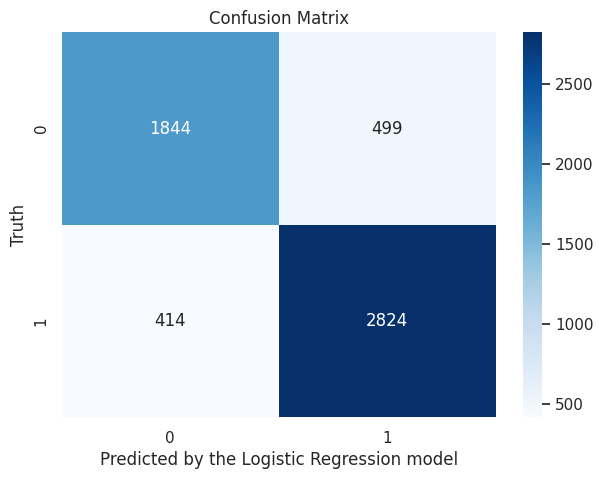

In [34]:
y_pred = logistic_regression_model.predict(X_test_scaled)

# Calculate confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
classif_report = classification_report(y_test, y_pred)

model_evaluation_metrics = {}
model_evaluation_metrics['Logistic Regression'] = {
    "Confusion Matrix": cm,
    'Classification Report': classif_report
}

print(f"Logistic Regression Evaluation Metrics:")
print("\nClassification Report:")
print(classif_report)
print("\n" + "="*60 + "\n")

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')  # Using 'Blues' colormap
plt.xlabel('Predicted by the Logistic Regression model')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [35]:
y_pred1 = logistic_regression_model.predict_proba(X_test)[:,1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [36]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8477


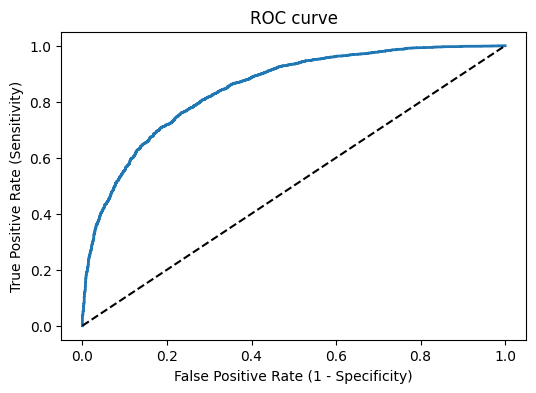

In [16]:
# plot ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# Пример кода для многовариантной (multinomial) логистической регрессии

# 1. Многовариантная логистическая регрессия (Multinomial)
Метрики качества для многовариантной логистической регрессии:
Accuracy: 0.9111

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


Матрица ошибок:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


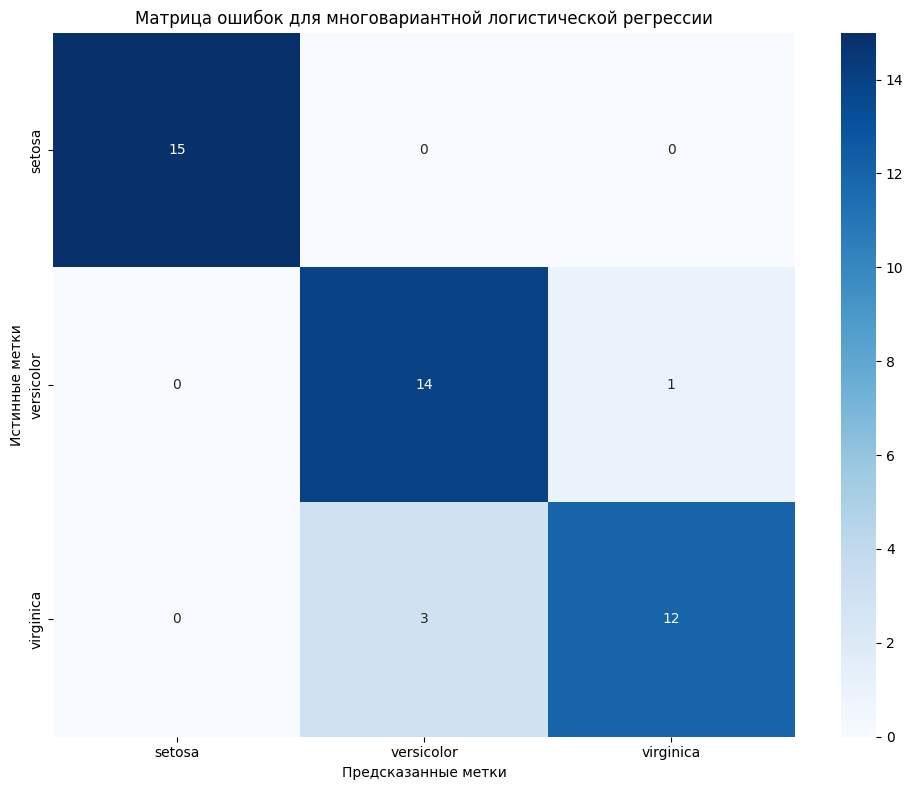

In [17]:
from sklearn.datasets import load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, roc_curve, auc,
                            precision_score, recall_score, f1_score,
                            roc_auc_score)
from sklearn.multiclass import OneVsRestClassifier


print("# 1. Многовариантная логистическая регрессия (Multinomial)")
print("=" * 80)

# Загрузим датасет Iris для многоклассовой классификации
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение многовариантной логистической регрессии
multi_model = LogisticRegression(
    multi_class='multinomial',  # многовариантная логистическая регрессия
    solver='lbfgs',  # метод оптимизации
    C=10,  # параметр регуляризации (обратно пропорционален силе регуляризации)
    max_iter=1000,
    random_state=42
)

multi_model.fit(X_train_scaled, y_train)

# Предсказание на тестовом наборе
y_pred_multi = multi_model.predict(X_test_scaled)
y_prob_multi = multi_model.predict_proba(X_test_scaled)

# Оценка модели
print("Метрики качества для многовариантной логистической регрессии:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_multi):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_multi, target_names=target_names))

print("\nМатрица ошибок:")
conf_matrix = confusion_matrix(y_test, y_pred_multi)
print(conf_matrix)

# Визуализация матрицы ошибок
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок для многовариантной логистической регрессии')
plt.tight_layout()
plt.show()

# K-NN

<a id=section-beg></a>
# <span style="color:#409996;font-weight:600;font-size:30px;font-style:sans-serif;">О методе K ближайших соседей</span>

Метод K ближайших соседей (K-NN) относится к непараметрическим моделям статистического машинного обучения. K-NN классифицирует запись, относя её к классу, к которому относятся похожие записи. Как правило, переменные-предикторы стандартизируются таким образом, чтобы переменные с большим диапазоном значений не доминировали в метрике расстояния.

**Словарь K-NN:**

* **Сосед**
    — запись, значения переменных-предикторов которой схожи со значениями другой записи
* **K**
    — количество соседей, учитываемых при расчёте
    — **Выбор K**: установка K = 1 редко является лучшим выбором, поскольку алгоритм очень чувствителен к выбросам. Мы почти всегда получаем лучшие результаты при K > 1 ближайших соседей. Не существует универсального правила для выбора оптимального значения K — оно во многом зависит от характера данных. Как правило, значение K находится в диапазоне от 1 до 20. Часто выбирают нечётное число, чтобы избежать совпадений.
    - Для хорошо структурированных данных с небольшим количеством шума лучше всего подходят меньшие значения K (например, для распознавания речи). **Для менее структурированных данных с большим уровнем шума лучше всего подходят большие значения K (например, для нашего набора данных).**
* ** Метрики расстояния**
    - Измеряют, суммируя в одном числе, насколько далеко одна запись находится от другой.
    - Евклидово расстояние: это мера истинного расстояния по прямой между двумя точками в евклидовом пространстве.
    - Расстояние по Манхэттену: Расстояние между двумя точками равно сумме абсолютных разностей их декартовых координат.
    - Расстояние Минковского: мы можем вычислить расстояние Минковского только в нормированном векторном пространстве, то есть в пространстве, где расстояния могут быть представлены в виде вектора, имеющего длину, и длина не может быть отрицательной.
    - Расстояние Махаланобиса: эта метрика расстояния рассматривает два сильно коррелирующих предиктора как один с точки зрения расстояния.
* **Стандартизация/нормализация**
    - Вычтите среднее значение из записи данных и разделите на стандартное отклонение
* **Z-оценка**
    — значение, полученное после стандартизации

**Как работает K-NN:**
1. Целевая переменная является бинарной (в нашем случае: is_depression, not_depression)
2. Мы хотим классифицировать новую запись данных
3. Мы находим K ближайших соседей (количество ближайших соседей) этой записи данных на основе метрики расстояния
4. Запись будет отнесена к тому классу, с которым у неё больше общих соседей (запись хочет попасть в группу более близких/дружелюбных записей 😉)

**Размер данных**

K-NN лучше всего работает с небольшими наборами данных, содержащими не более 100 000 строк. Чем больше набор данных, тем больше вычислительной мощности он потребляет (вычисляя расстояние между новой записью и каждой существующей точкой) и тем медленнее работает K-NN.

--------------------------------------------------------------------------------------------------------------------


**❗️ Чтобы подготовить данные для алгоритма K-NN, мы должны соответствовать четырём критериям:** ❗️
* **Числовые переменные**
* **Обработка отсутствующих данных**
* **Масштабирование данных**
* **Уменьшение размерности**

**Числовые переменные**

 Все переменные должны быть числовыми, так как алгоритм принимает только числовые входные данные.

**Обработка отсутствующих данных**

Отсутствующие данные будут означать, что расстояние между выборками не может быть вычислено. Эти отсутствующие значения можно исключить или заменить.

**Перемасштабируйте данные**

Основная идея состоит в том, чтобы нормализовать/стандартизировать, т. е. μ = 0 и σ = 1, ваши признаки/переменные/столбцы X по отдельности, прежде чем подгонять модель K-NN, чтобы переменные с большим масштабом не доминировали в метрике расстояния. Стандартизация приводит все переменные к одинаковому масштабу путём вычитания среднего значения и деления на стандартное отклонение. Таким образом, мы гарантируем, что одна переменная не будет оказывать слишком сильное влияние на входные данные модели только из-за своего исходного масштаба. На влияние переменных на модель не влияет масштаб их исходного измерения.

**Уменьшение размерности**

K-NN подходит для данных с меньшим количеством измерений. Вы можете попробовать использовать его для данных с большим количеством измерений (сотни или тысячи входных переменных), но имейте в виду, что он может работать не так хорошо, как другие методы. K-NN может извлечь выгоду из выбора признаков, который уменьшает размерность входного пространства признаков.


--------------------------------------------------------------------------------------------------------------------

**Преимущества KNN**

1. Отсутствие периода обучения: KNN называется «ленивым» (обучение на основе примеров). Он ничего не изучает в период обучения. Другими словами, для него нет периода обучения. Он сохраняет обучающий набор данных и изучает его только во время прогнозирования в реальном времени. Это делает алгоритм KNN намного быстрее, чем другие алгоритмы, требующие обучения, например, SVM, линейную регрессию и т. д.

2. Поскольку алгоритм KNN не требует обучения перед прогнозированием, можно легко добавлять новые данные, что не повлияет на точность алгоритма.

3. KNN очень прост в реализации. Для реализации KNN требуются только два параметра: значение K и функция расстояния.

**Недостатки KNN (подробно описаны выше)**

1. Плохо работает с большими наборами данных.
2. Плохо работает с большим количеством измерений.
3. Требуется масштабирование признаков: перед применением алгоритма KNN к любому набору данных необходимо выполнить масштабирование признаков (стандартизацию и нормализацию).
4. Чувствителен к зашумлённым данным, отсутствующим значениям и выбросам.

In [37]:
# create numpy array for future K value
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [38]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

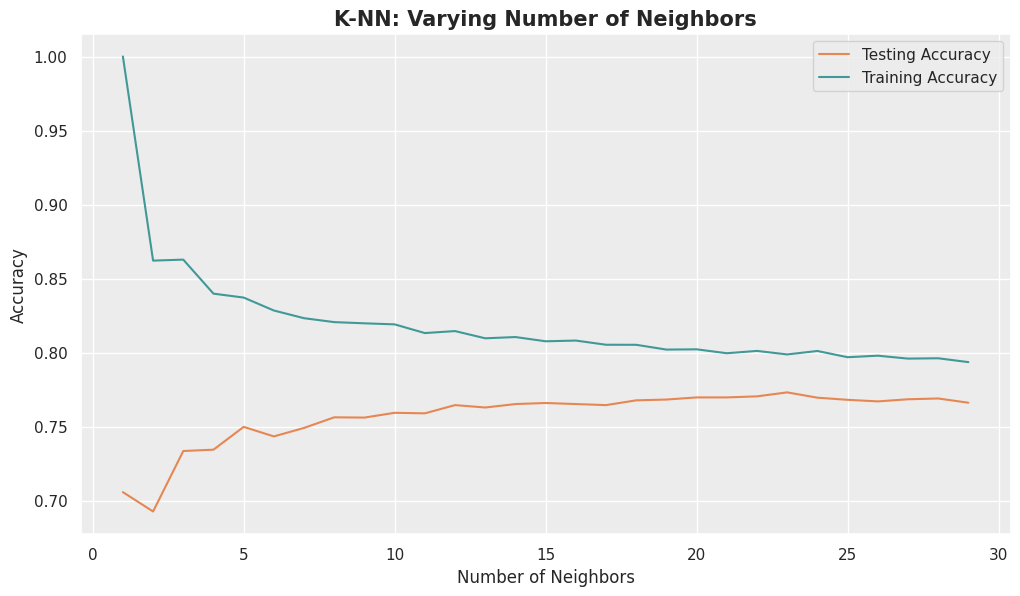

In [39]:
# Generate plot
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of all plots
plt.figure(figsize=(12,6.5))
plt.title(label='K-NN: Varying Number of Neighbors', fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy', color='#E68753')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy', color = '#409996')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

[[1482  861]
 [ 405 2833]]


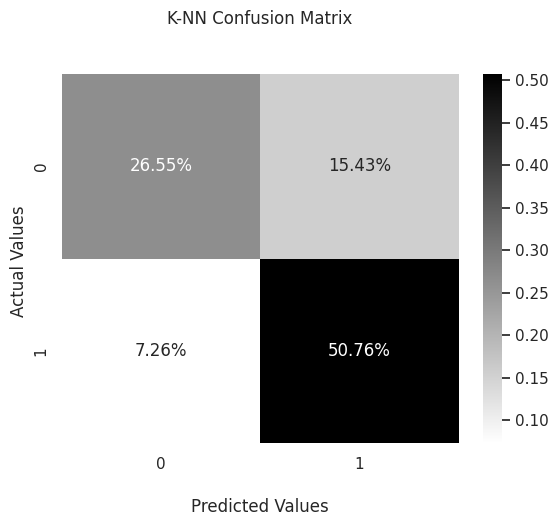

In [40]:
#implement K-NN algorithm
knnc = KNeighborsClassifier(n_neighbors=23)
knnc.fit(X_train, y_train)
y_pred_knnc = knnc.predict(X_test)

#plotting Confusion Matrix
cf_matrix_knnc = confusion_matrix(y_test, y_pred_knnc)
print(cf_matrix_knnc)

ax = sns.heatmap(cf_matrix_knnc/np.sum(cf_matrix_knnc), annot=True, fmt='.2%', cmap='binary')
ax.set_title('K-NN Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [41]:
#evaluation of K-NN: metrics pivot chart
print(classification_report(y_test, y_pred_knnc))

print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred_knnc),3)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred_knnc),3)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred_knnc),3)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred_knnc),3)))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70      2343
           1       0.77      0.87      0.82      3238

    accuracy                           0.77      5581
   macro avg       0.78      0.75      0.76      5581
weighted avg       0.77      0.77      0.77      5581

Accuracy Score : 0.773
Precision Score : 0.767
Recall Score : 0.875
F-Score : 0.817
